In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
pd.set_option('display.max_columns', None)

In [67]:
df = pd.read_csv('/content/fraud_oracle_modelbuilding.csv')

In [68]:
df

,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year
0,5,3,2,0,2,1,1,1,1,21,0,8,1,5,0,12,300,1,0,0,1,5,0,0,0,0,3,2,1994
1,3,3,2,0,1,1,4,0,1,34,0,3,1,5,0,15,400,4,0,0,1,2,1,0,0,0,0,0,1994
2,5,5,2,0,4,11,2,0,0,47,0,3,1,5,0,7,400,3,0,0,2,0,0,0,0,0,0,0,1994
3,2,6,1,1,5,7,1,0,0,65,1,1,1,1,0,4,400,2,0,0,2,1,1,0,0,1,0,0,1994
4,5,1,2,0,2,2,2,1,1,27,1,3,1,5,0,3,400,1,0,0,1,3,0,0,0,0,0,0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,4,5,1,0,2,11,5,0,0,35,0,0,0,1,1,5,400,4,0,0,0,2,0,0,0,0,0,0,1996
15096,5,4,0,0,5,12,1,0,0,30,0,1,1,2,0,11,400,3,0,0,3,2,0,0,0,1,0,2,1996
15097,5,4,1,1,5,12,1,0,1,24,0,0,0,1,1,4,400,4,0,0,3,3,0,0,0,2,0,0,1996
15098,1,1,1,0,4,12,2,1,0,34,1,2,0,1,0,6,400,4,0,0,1,6,0,0,0,1,0,0,1996


In [69]:
X = df.loc[:, df.columns != 'FraudFound_P']
y = df['FraudFound_P']

In [70]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [71]:
pd.Series(y_resampled_smote).value_counts()

FraudFound_P
0    11369
1    11369
Name: count, dtype: int64

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [73]:
classifier_smote = LogisticRegression()
classifier_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_pred_smote = classifier_smote.predict(X_test)
y_proba_smote = classifier_smote.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_smote))

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2839
           1       0.07      0.35      0.12       181

    accuracy                           0.69      3020
   macro avg       0.51      0.53      0.46      3020
weighted avg       0.89      0.69      0.77      3020



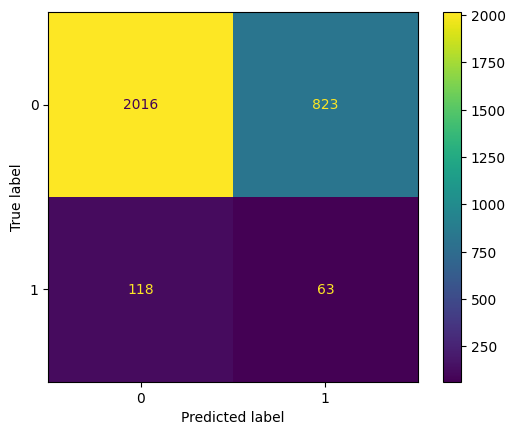

In [74]:
confusion_matrix = confusion_matrix(y_test, y_pred_smote)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [75]:
print(accuracy_score(y_test, y_pred_smote))

0.68841059602649


In [76]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Applying SMOTE
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict test set
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_brf))

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      2839
           1       0.14      0.87      0.24       181

    accuracy                           0.66      3020
   macro avg       0.56      0.76      0.51      3020
weighted avg       0.94      0.66      0.75      3020



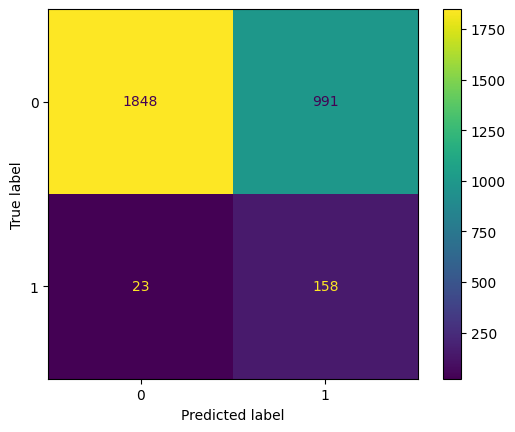

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_brf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [78]:
print(accuracy_score(y_test, y_pred_brf))

0.6642384105960265


In [79]:
import xgboost as xgb


In [80]:
classifier_xgb = xgb.XGBClassifier(random_state=42)
classifier_xgb.fit(X_resampled_smote, y_resampled_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [81]:
classifier_xgb = xgb.XGBClassifier(random_state=42)
classifier_xgb.fit(X_resampled_smote, y_resampled_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

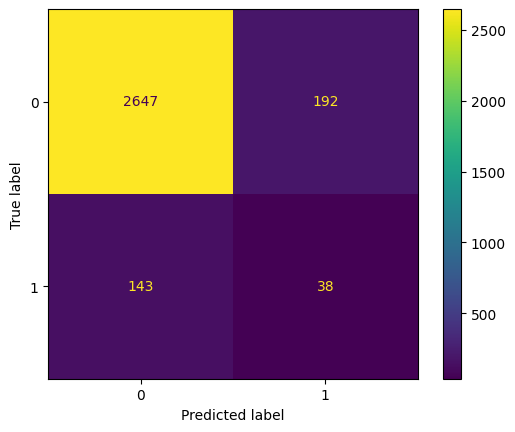

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_xgb = classifier_xgb.predict(X_test)

# Use the imported confusion_matrix function
confusion_matrix_result = confusion_matrix(y_test, y_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [83]:
print(accuracy_score(y_test, y_pred_xgb))

0.8890728476821192


In [84]:
# xgb1 = xgb.XGBClassifier(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

In [85]:
# xgb1.fit(X_resampled_smote, y_resampled_smote)

In [86]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_pred_xgb1 = xgb1.predict(X_test)

# # Use the imported confusion_matrix function
# confusion_matrix_result = confusion_matrix(y_test, y_pred_xgb1)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = [0, 1])

# cm_display.plot()
# plt.show()

In [87]:
# print(accuracy_score(y_test, y_pred_xgb1))

In [88]:
# clearly accuracy have improved with some value

In [89]:
# from xgboost import plot_importance
# plot_importance(xgb1)

# # Customize the plot (optional)
# plt.title('Feature Importance')
# plt.xlabel('F Score')
# plt.ylabel('Features')
# plt.show()

# Hyperparameter Tuning

In [90]:
dtrain = xgb.DMatrix(X_resampled_smote,y_resampled_smote)
dtest  = xgb.DMatrix(X_test,y_test)

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv_ = KFold(n_splits=10)

xg_reg = xgb.XGBClassifier()
scores = cross_val_score(xg_reg, X_resampled_smote,y_resampled_smote , scoring = 'accuracy',n_jobs = -1,cv = cv_)
print(np.mean(scores), np.std(scores))
print(scores)

0.9446342498706664 0.04331190402007486
[0.90457344 0.8935796  0.89753738 0.91116974 0.90325418 0.96921724
 0.99252419 0.99164468 0.98900132 0.99384074]


In [92]:
# pip install optuna

In [93]:
from sklearn.pipeline import Pipeline

In [94]:
import optuna

In [135]:
def objective_xgb(trial):
    xgb_params = {
        'learning_rate': 0.03,
        'booster': 'gbtree',
        'eval_metric' : 'logloss',
        'objective' : 'binary:hinge',
        'n_estimators': trial.suggest_int('n_estimators', 700, 1000, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 2.0, 6.0),
        'subsample': trial.suggest_float('subsample', 0.3, 0.9, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0, step=0.1),
        'max_depth': trial.suggest_int('max_depth', 7, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 10),
        'gamma': trial.suggest_float('gamma', 0.13, 0.3)
    }

    pipe = Pipeline(steps = [
    ('step2' , xgb.XGBClassifier(**xgb_params))
     ])

    pipe.fit(X_resampled_smote,y_resampled_smote)
    y_pred = pipe.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [136]:
study_xgb= optuna.create_study(direction = 'maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

[I 2024-07-03 08:43:17,669] A new study created in memory with name: no-name-9c50511e-9e76-4956-9184-7f12fd72c919
[I 2024-07-03 08:43:24,041] Trial 0 finished with value: 0.9125827814569536 and parameters: {'n_estimators': 750, 'reg_lambda': 0.6183400738708933, 'reg_alpha': 3.947798374445744, 'subsample': 0.9, 'colsample_bytree': 0.9, 'max_depth': 9, 'min_child_weight': 9, 'gamma': 0.2530720996138044}. Best is trial 0 with value: 0.9125827814569536.
[I 2024-07-03 08:43:27,412] Trial 1 finished with value: 0.8947019867549669 and parameters: {'n_estimators': 865, 'reg_lambda': 0.4007361807652956, 'reg_alpha': 3.985386384872591, 'subsample': 0.3, 'colsample_bytree': 1.0, 'max_depth': 7, 'min_child_weight': 9, 'gamma': 0.2668505272594852}. Best is trial 0 with value: 0.9125827814569536.
[I 2024-07-03 08:43:30,446] Trial 2 finished with value: 0.8966887417218543 and parameters: {'n_estimators': 755, 'reg_lambda': 1.6562289724181671, 'reg_alpha': 4.124418883645227, 'subsample': 0.7, 'colsamp

In [137]:
trial = study_xgb.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.9152317880794701


In [138]:
### printing the best estimators
study_xgb.best_params

{'n_estimators': 835,
 'reg_lambda': 1.5649204974345132,
 'reg_alpha': 4.069889496209269,
 'subsample': 0.5,
 'colsample_bytree': 0.9,
 'max_depth': 9,
 'min_child_weight': 5,
 'gamma': 0.21059737665405856}

In [139]:
optuna.visualization.plot_optimization_history(study_xgb)

In [140]:
optuna.visualization.plot_slice(study_xgb)

In [141]:
model = xgb.XGBClassifier(n_estimators= 740,
 reg_lambda= 0.2187848613421278,
 reg_alpha= 3.525658207370625,
 subsample=0.9,
 colsample_bytree=0.9,
 max_depth= 10,
 min_child_weight= 5,
 gamma= 0.22713372827916722,
 learning_rate= 0.03,
 booster='gbtree',
 eval_metric='logloss',
 objective='binary:hinge')
model.fit(X_resampled_smote, y_resampled_smote)

# {'n_estimators': 700,
#  'reg_lambda': 0,
#  'reg_alpha': 2,
#  'subsample': 0.9,
#  'colsample_bytree': 0.9,
#  'max_depth': 10,
#  'min_child_weight': 5,
#  'gamma': 0.2559067753503072}  gives accuracy 91.62

# {'n_estimators': 740, 'reg_lambda': 0.2187848613421278,
#  'reg_alpha': 3.525658207370625, 'subsample': 0.9, 'colsample_bytree': 0.9,
#  'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.22713372827916722}
# accuracy = 91.82

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.22713372827916722, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=740,
              n_jobs=None, num_parallel_tree=None, objective='binary:hinge', ...)

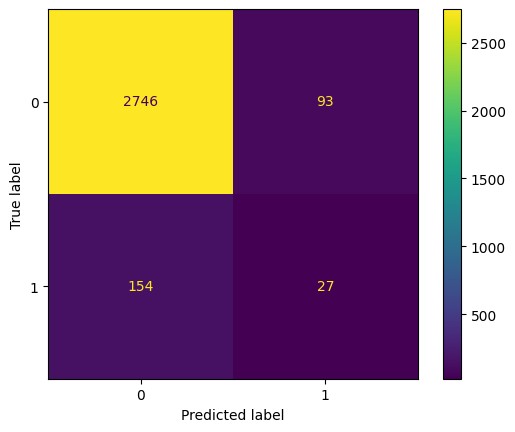

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_xgb = model.predict(X_test)

# Use the imported confusion_matrix function
confusion_matrix_result = confusion_matrix(y_test, y_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_result, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [143]:
print(accuracy_score(y_test, y_pred_xgb))

0.9182119205298013


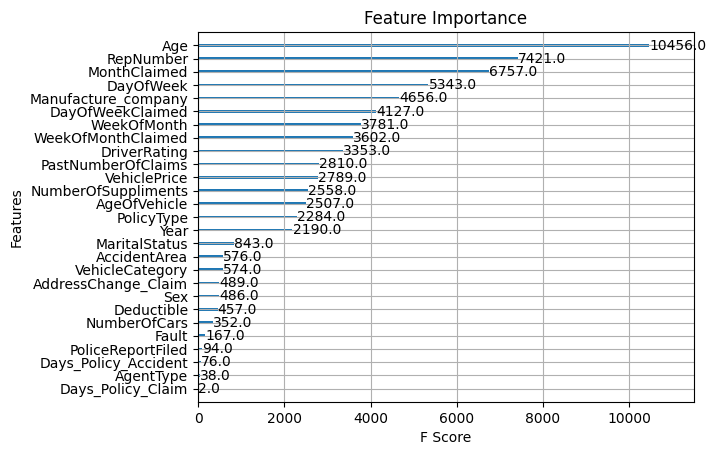

In [144]:
from xgboost import plot_importance
plot_importance(model)

# Customize the plot (optional)
plt.title('Feature Importance')
plt.xlabel('F Score')
plt.ylabel('Features')
plt.show()

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv_ = KFold(n_splits=10)


scores = cross_val_score(model, X_resampled_smote,y_resampled_smote , scoring = 'accuracy',n_jobs = -1,cv = cv_)
print(np.mean(scores))
print(scores)

0.9649074002060825
[0.94019349 0.92919965 0.93711522 0.93843448 0.9353562  0.98065084
 0.99692172 0.99692172 0.99516058 0.99912011]


In [146]:

import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [148]:
len(X_resampled_smote.columns)

28